# Analysis of Response of a Damped 1 DoF Sytem under Harmonic Excitation Force

If the harmonic excitation force is given by $ F(t) = F_o \cos(\omega t) $ , then the equation of motion of the system is:

$$ m\ddot{x} + c\dot{x} + kx = F_o\cos(\omega t) $$

The total solution / response of the system is given by $ x(t) = x_{cf} (t) + x_p (t) $, where the complimentary function ($ x_{cf} (t) $) describes the steady state response of the system and the particular solution ( $ x_p (t) $) describes the transient response of the system.

The complimentary function is given by : $ x_{cf} (t) =  X_o e^{-\xi \omega_{n} t} \cos(w_dt-\phi_o) $,
where $ \omega_d = \sqrt{1-\xi ^2} \omega_n $ (frequency of damped vibration).

To find the particular solution of the response, we use the phasor representation of the system responses. The particular solution is considered as harmonic and is assumed as : $ x_p = X\cos(\omega t -\phi) $ (where X is the amplitude of respomse and $\phi$ is the phase angle of response).

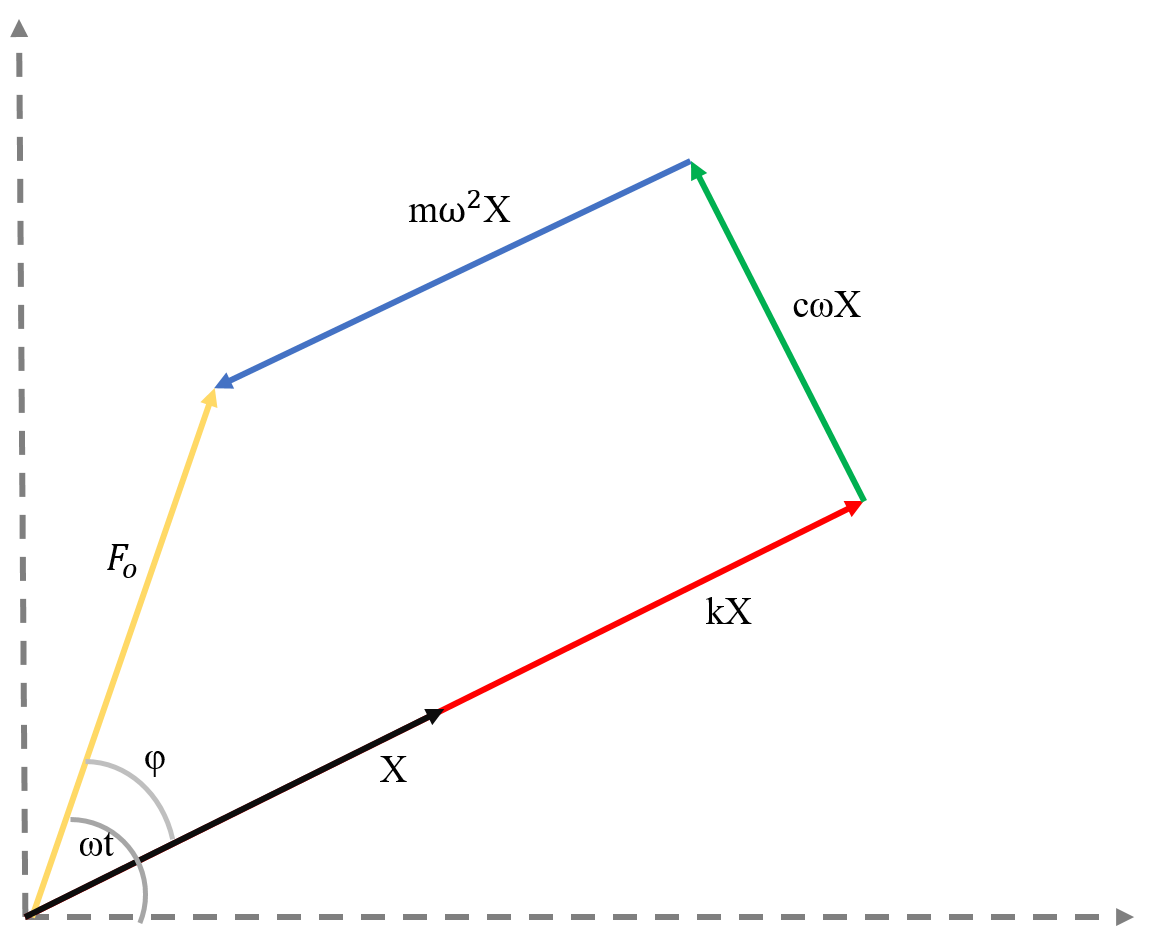

The total response of the system is given by : 
$$ x(t) =  X_o e^{-\xi \omega_{n} t} \cos(w_dt-\phi_0) + X\cos(\omega t -\phi)$$

$$ X = \frac{F_o}{\sqrt {(k - m\omega^2)^2 + (c\omega)^2}} $$

$$ \phi = \arctan\left(\frac{c\omega}{k - m\omega^2}\right) $$

substituting the initial conditions as $x(0)=x_o$ and $\dot{x}(0) = \dot{x_o}$ ,

we get the solution of $X_o$ and $\phi_o$ as:

$$ X_o = \left((x_o - X\cos\phi)^2 + \frac{(\xi\omega_n x_o + \dot{x_o} - \xi\omega_n \cos\phi - \omega X \sin\phi)^2}{{\omega_d}^2}\right)^\frac{1}{2} $$

$$ \tan\phi_o = \frac{\xi\omega_n x_o +\xi\omega_n X \cos\phi - \omega X\sin\phi}{\omega_n ( x_o - X\cos\phi)} $$

substituting : $$ \omega_n = \sqrt{\frac{k}{m}} $$ 

$$ \xi = \frac{c}{c_c} = \frac{c}{2\sqrt{mk}} $$

$$ \delta_{st} = \frac{F_o}{k} $$

$$ r = \frac{\omega}{\omega_n} $$

where $\omega_n$ = undamped natural frequency ; $\xi$ = damping ratio ; $\delta_{st}$ = deflection under the static force $F_o$ ; $r$ = frequency ratio.

The graphical visualization of the response of the system is given below:

In [1]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(F,w,k,m,c,x_0,v_0):
    plt.figure(2)
    x = np.linspace(0, 5.0, num=1000)
    f = F*(np.cos(w*x))
    w_n = np.sqrt(k/m)
    c_c = 2*np.sqrt(m*k)
    eta = c/c_c
    r=w/w_n
    w_d = np.sqrt(np.absolute((1-eta**2)))*w_n
    X = (F/(np.sqrt(np.absolute((k-m*(w)**2)**2+(c*w)**2))))
    theta = np.arctan((2*eta*r)/(1-r**2))
    x_p = X*(np.cos(w_n*x - theta))*1000 # Transient Reponse
    x_1 = x_0/1000
    X_0 = np.sqrt(np.absolute((x_1 -X*np.cos(theta))**2 + ((eta*w_n*x_1+v_0-(eta*w_n*X*np.cos(theta))-(w*X*np.sin(theta)))**2)/(w_d**2)))
    phi = np.arctan((eta*w_n*x_1+v_0-(eta*w_n*X*np.cos(theta))-(w*X*np.sin(theta)))/(w_d*(x_1-X*np.cos(theta))))
    x_s = X_0*(np.exp(-1*eta*w_n*x))*(np.cos(w_d*x-phi))*1000  # Steady State Response              
    plt.plot(x, f,label='Forcing Function')
    plt.plot(x,x_p,label='Transient Response')
    plt.plot(x,x_s,label='Steady State Response')
    plt.ylim(-100,100 )
    plt.xlim(0,1)
    plt.title("Response of System")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.hlines(0,0,1)
    plt.text(1.2,100.0,"Natural Frequency : %f rad/s" %w_n)
    plt.text(1.2,90.0,"Frequency Ratio : %f " %r)
    plt.text(1.2,80.0,"Damping Ratio : %f " %eta)
    plt.text(1.2,60.0,"Amplitude of Transient Response : %f mm" %(X*1000))
    plt.text(1.2,50.0,"Phase Angle of Transient Response : %f degree" %(theta*180/np.pi))
    plt.text(1.2,30.0,"Amplitude of Steady State Response : %f mm" %(X_0*1000))
    plt.text(1.2,20.0,"Phase angle of Steady State Response : %f degree" %(phi*180/np.pi))
    if eta>1:
        plt.text(1.2,0.0,"Overdamped System")
    elif eta==1:
        plt.text(1.2,0.0,"Critically Damped System")
    else:
        plt.text(1.2,0.0,"Underdamped System")
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

interactive_plot = interactive(f, F=(0,100,10), w =(0,100,10),k = (100,5000,100),m =(1,10,1),c=(0,200,1),x_0 =(0,10,0.1),v_0 =(0,1,0.1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=50, description='F', step=10), IntSlider(value=50, description='w', step…

__Magnification Factor vs. Frequency Ratio__

$$ \frac{X}{\delta_{st}} = \frac{1}{\sqrt{(1-r^2)^2 + (2 \xi r)^2}} $$

In [2]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(eta):
    plt.figure(2)
    r = np.linspace(0, 5.0, num=1000)
    s = 1/(np.sqrt((1-r**2)**2 + (2*eta*r)**2))
    plt.plot(r, s)
    plt.ylim(0, 3.0)
    plt.xlim(0,5.0)
    plt.title("Magnification Factor vs. Frequency Ratio")
    plt.xlabel("Frequency Ratio")
    plt.ylabel("Magnification Factor")
    if eta<1:
        plt.text(1.3,-0.70,"Underdamped System", fontsize =13)
    elif eta==1:
        plt.text(1.3,-0.70,"Critically Damped System",fontsize =13)
    else : 
        plt.text(1.3,-0.70,"Overdamped System",fontsize =13)
    plt.show()

interactive_plot = interactive(f, eta=(0, 3, 0.01))
output = interactive_plot.children[-1]
output.layout.height = '300px'
interactive_plot

interactive(children=(FloatSlider(value=1.0, description='eta', max=3.0, step=0.01), Output(layout=Layout(heig…

__Phase Angle vs. Frequency Ratio__

$$ \theta = \arctan\left(\frac{2\xi r}{1-r^2}\right) $$

In [3]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(eta):
    plt.figure(2)
    r = np.linspace(0, 5.0, num=1000)
    theta = np.piecewise(r,[r <= 1.0, r >1.0],[lambda r : np.arctan((2*eta*r)/(1-r**2))*180/np.pi, lambda r: 180+1*np.arctan((2*eta*r)/(1-r**2))*180/np.pi])
    plt.plot(r, theta)
    plt.ylim(0, 200.0)
    plt.xlim(0,5.0)
    plt.title("Phase Angle vs. Frequency Ratio")
    plt.xlabel("Frequency Ratio")
    plt.ylabel("Phase Angle")
    #plt.text(1.0,-0.75,"Damping Ratio : %f "%eta, fontsize =14)
    plt.hlines(90,0,5)
    plt.hlines(180,0,5)
    if eta<1:
        plt.text(1.3,-40,"Underdamped System", fontsize =13)
    elif eta==1:
        plt.text(1.3,-40,"Critically Damped System",fontsize =13)
    else : 
        plt.text(1.3,-40,"Overdamped System",fontsize =13)
    plt.grid()
    plt.show()

interactive_plot = interactive(f, eta=(0, 3, 0.01))
output = interactive_plot.children[-1]
output.layout.height = '300px'
interactive_plot

interactive(children=(FloatSlider(value=1.0, description='eta', max=3.0, step=0.01), Output(layout=Layout(heig…